In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
from numpy import log
import pandas as pd
import os
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf

In [3]:
#12

In [3]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

df = pd.read_csv('2010_zip_2_monthly_data.csv', names=['value'], header=0)

model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=996.878, BIC=1008.028, Time=0.476 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1118.299, BIC=1123.874, Time=0.020 seconds
Fit ARIMA: (1, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1032.661, BIC=1041.023, Time=0.210 seconds
Fit ARIMA: (0, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=1073.176, BIC=1081.539, Time=0.355 seconds
Fit ARIMA: (0, 0, 0)x(0, 0, 0, 0) (constant=False); AIC=1379.875, BIC=1382.662, Time=0.014 seconds
Fit ARIMA: (2, 0, 1)x(0, 0, 0, 0) (constant=True); AIC=998.636, BIC=1012.573, Time=0.840 seconds
Fit ARIMA: (1, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=998.590, BIC=1012.528, Time=0.814 seconds
Fit ARIMA: (0, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=1052.520, BIC=1063.670, Time=0.337 seconds
Fit ARIMA: (2, 0, 0)x(0, 0, 0, 0) (constant=True); AIC=1020.218, BIC=1031.368, Time=0.265 seconds
Fit ARIMA: (2, 0, 2)x(0, 0, 0, 0) (constant=True); AIC=998.331, BIC=1015.056,

In [5]:
# 13

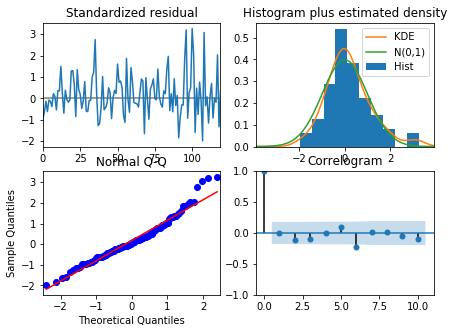

In [4]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

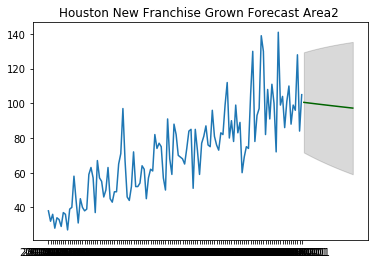

In [5]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Houston New Franchise Grown Forecast Area2 ")
plt.show()

In [6]:
confint

array([[ 71.65140812, 129.46624057],
       [ 70.98637108, 129.82872956],
       [ 70.33563418, 130.17836005],
       [ 69.69847935, 130.51584323],
       [ 69.07425074, 130.84182811],
       [ 68.46234729, 131.15690895],
       [ 67.86221636, 131.46163161],
       [ 67.27334832, 131.75649899],
       [ 66.69527191, 132.04197564],
       [ 66.12755017, 132.31849183],
       [ 65.56977701, 132.58644704],
       [ 65.0215741 , 132.84621296],
       [ 64.48258825, 133.09813622],
       [ 63.95248901, 133.3425407 ],
       [ 63.43096669, 133.57972958],
       [ 62.91773043, 133.80998724],
       [ 62.41250666, 134.03358079],
       [ 61.91503759, 134.25076159],
       [ 61.42507995, 134.46176653],
       [ 60.94240382, 134.66681915],
       [ 60.46679159, 134.86613073],
       [ 59.99803701, 135.05990122],
       [ 59.53594438, 135.24832006],
       [ 59.08032772, 135.43156696]])

In [9]:
#14

C:\Users\foxru\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


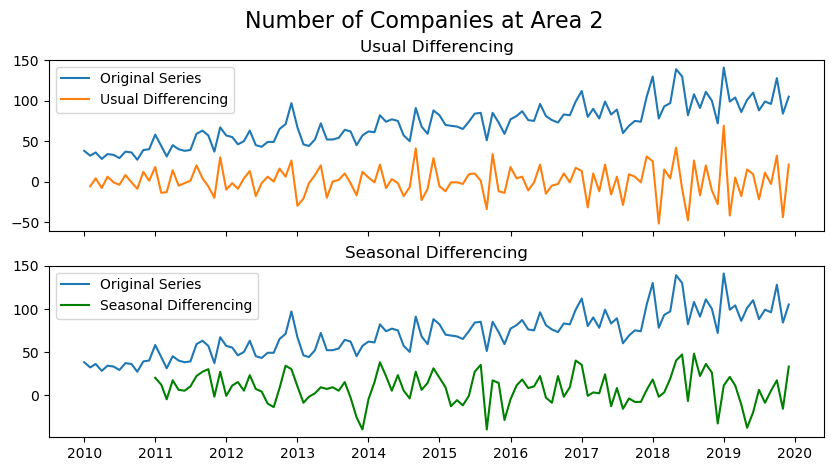

In [7]:
# Import
data = pd.read_csv('2010_zip_2_monthly_data.csv', parse_dates=['date'], index_col='date')

# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Number of Companies at Area 2', fontsize=16)
plt.show()

In [8]:
# !pip3 install pyramid-arima
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 1, 1, 12) (constant=True); AIC=888.908, BIC=902.319, Time=2.212 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 12) (constant=True); AIC=934.429, BIC=939.793, Time=0.038 seconds
Fit ARIMA: (1, 0, 0)x(1, 1, 0, 12) (constant=True); AIC=899.427, BIC=910.156, Time=1.163 seconds
Fit ARIMA: (0, 0, 1)x(0, 1, 1, 12) (constant=True); AIC=887.362, BIC=898.090, Time=0.808 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 12) (constant=False); AIC=950.654, BIC=953.336, Time=0.029 seconds
Fit ARIMA: (0, 0, 1)x(0, 1, 0, 12) (constant=True); AIC=931.474, BIC=939.520, Time=0.345 seconds
Fit ARIMA: (0, 0, 1)x(1, 1, 1, 12) (constant=True); AIC=888.354, BIC=901.765, Time=1.212 seconds
Fit ARIMA: (0, 0, 1)x(0, 1, 2, 12) (constant=True); AIC=888.186, BIC=901.597, Time=2.374 seconds
Fit ARIMA: (0, 0, 1)x(1, 1, 0, 12) (constant=True); AIC=899.151, BIC=909.879, Time=1.017 seconds
Fit ARIMA: (0, 0, 1)x(1, 1, 2, 12) (constant=True); AIC=889.731, BIC=905.824, Time=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:                          y   No. Observations:                  120
Model:             SARIMAX(0, 1, [1], 12)   Log Likelihood                -440.373
Date:                    Sun, 29 Mar 2020   AIC                            886.745
Time:                            23:16:28   BIC                            894.792
Sample:                                 0   HQIC                           890.008
                                    - 120                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.4297      0.455     16.333      0.000       6.538       8.321
ma.S.L12      -0.7728      0.120     -6.434      0.000      -1.008      -0.537
sigma2       184.3333     22.670      8.131      0.000     139.902     228.765
===================================================================================
Ljung-Box (Q):                       33.36   Jarque-Bera (JB):                 1.29
Prob(Q):                              0.76   Prob(JB):                         0.53
Heteroskedasticity (H):               2.22   Skew:                             0.03
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

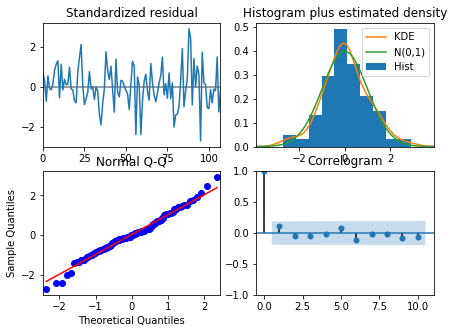

In [9]:
smodel.plot_diagnostics(figsize=(7,5))
plt.show()

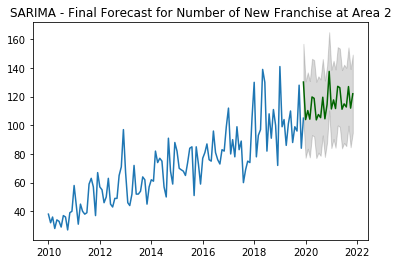

In [10]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast for Number of New Franchise at Area 2")
plt.show()

In [15]:
confint

array([[103.55823168, 156.84111431],
       [ 77.34637986, 130.62926249],
       [ 83.65548773, 136.93837035],
       [ 77.63667937, 130.91956199],
       [ 93.14834013, 146.43122275],
       [ 92.18964714, 145.47252977],
       [ 77.14704929, 130.42993192],
       [ 80.91332695, 134.19620958],
       [ 78.70970322, 131.99258584],
       [ 92.96265419, 146.24553682],
       [ 77.91332453, 131.19620715],
       [ 87.95774447, 141.24062709],
       [110.31076228, 164.94789246],
       [ 84.09891046, 138.73604064],
       [ 90.40801832, 145.0451485 ],
       [ 84.38920996, 139.02634014],
       [ 99.90087073, 154.5380009 ],
       [ 98.94217774, 153.57930792],
       [ 83.89957989, 138.53671007],
       [ 87.66585755, 142.30298773],
       [ 85.46223382, 140.09936399],
       [ 99.71518479, 154.35231496],
       [ 84.66585513, 139.3029853 ],
       [ 94.71027506, 149.34740524]])

In [15]:
#15

In [12]:
# Import Data
data = pd.read_csv('2010_zip_2_monthly_data.csv', parse_dates=['date'], index_col='date')

In [13]:
# Compute Seasonal Index
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# multiplicative seasonal component
result_mul = seasonal_decompose(data['value'][-36:],   # 3 years
                                model='multiplicative', 
                                extrapolate_trend='freq')

seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

# merge with the base data
data['month'] = data.index.month
df = pd.merge(data, seasonal_index, how='left', on='month')
df.columns = ['value', 'month', 'seasonal_index']
df.index = data.index  # reassign the index.

In [14]:
import pmdarima as pm

# SARIMAX Model
sxmodel = pm.auto_arima(df[['value']], exogenous=df[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 1, 1, 12) (constant=True); AIC=890.908, BIC=907.001, Time=2.691 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 12) (constant=True); AIC=936.429, BIC=944.476, Time=0.108 seconds
Fit ARIMA: (1, 0, 0)x(1, 1, 0, 12) (constant=True); AIC=901.427, BIC=914.838, Time=1.433 seconds
Fit ARIMA: (0, 0, 1)x(0, 1, 1, 12) (constant=True); AIC=889.362, BIC=902.772, Time=1.105 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 12) (constant=False); AIC=952.654, BIC=958.018, Time=0.279 seconds
Fit ARIMA: (0, 0, 1)x(0, 1, 0, 12) (constant=True); AIC=933.474, BIC=944.202, Time=0.447 seconds
Fit ARIMA: (0, 0, 1)x(1, 1, 1, 12) (constant=True); AIC=890.354, BIC=906.447, Time=1.421 seconds
Fit ARIMA: (0, 0, 1)x(0, 1, 2, 12) (constant=True); AIC=890.186, BIC=906.279, Time=2.725 seconds
Fit ARIMA: (0, 0, 1)x(1, 1, 0, 12) (constant=True); AIC=901.151, BIC=914.561, Time=1.081 seconds
Fit ARIMA: (0, 0, 1)x(1, 1, 2, 12) (constant=True); AIC=891.731, BIC=910.506, Time=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:                          y   No. Observations:                  120
Model:             SARIMAX(0, 1, [1], 12)   Log Likelihood                -440.373
Date:                    Sun, 29 Mar 2020   AIC                            888.745
Time:                            23:18:05   BIC                            899.474
Sample:                        01-01-2010   HQIC                           893.095
                             - 12-01-2019                                         
Covariance Type:                      opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept          7.4297      0.516     14.410      0.000       6.419       8.440
seasonal_index     0.0002   3.93e+04   3.96e-09      1.000   -7.71e+04    7.71e+04
ma.S.L12          -0.7728      0.120     -6.433      0.000      -1.008      -0.537
sigma2           184.3334     22.687      8.125      0.000     139.868     228.799
===================================================================================
Ljung-Box (Q):                       33.36   Jarque-Bera (JB):                 1.29
Prob(Q):                              0.76   Prob(JB):                         0.53
Heteroskedasticity (H):               2.22   Skew:                             0.03
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""